In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# The Dataset

It is data collected by the university of wisconsin to describe breast cells and classifies them with 11 attributes including if the cells are benign or malignant for cancer. The data set was collected through 8 seperate trials with a total of 699 data points. 

In [2]:
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data",
                header = None,
                names=['ID','Clump Thickness', 'Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Cell Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli', 'Mitoses','Class'])

In [3]:
df.head(10)

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Cell Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


## EDA
Now to look at the distribution, look at the data types and observe if there are any null values or missing data.

In [4]:
print('The number of samples:', df.shape[0])

The number of samples: 699


In [5]:
df.dtypes

ID                                   int64
Clump Thickness                      int64
Uniformity of Cell Size              int64
Uniformity of Cell Shape             int64
Marginal Adhesion                    int64
Single Cell Epithelial Cell Size     int64
Bare Nuclei                         object
Bland Chromatin                      int64
Normal Nucleoli                      int64
Mitoses                              int64
Class                                int64
dtype: object

In [6]:
df['Bare Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [7]:
df.loc[df['Bare Nuclei']=='?']

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Cell Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [8]:
print ('{:.2f}% of the Data is missing information from the bare nuclie column'.format(len(df.loc[df['Bare Nuclei']=='?'])/len(df)*100))

2.29% of the Data is missing information from the bare nuclie column


#### Since only 2.29% of the data is missing information which is a very low amount of the total dataset we can drop this data from our data set.

In [9]:
df = df.drop(df[df['Bare Nuclei']=='?'].index).reset_index(drop = True)
df = df.drop('ID', axis =1)

In [10]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Cell Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [11]:
df = df.astype(np.int64, copy= False)

In [12]:
df.dtypes

Clump Thickness                     int64
Uniformity of Cell Size             int64
Uniformity of Cell Shape            int64
Marginal Adhesion                   int64
Single Cell Epithelial Cell Size    int64
Bare Nuclei                         int64
Bland Chromatin                     int64
Normal Nucleoli                     int64
Mitoses                             int64
Class                               int64
dtype: object

In [15]:
df['Class'] = np.where(df['Class']==2, 0, 1)

### Distribution of variables

In [16]:
df['Class'].describe()

count    683.000000
mean       0.349927
std        0.477296
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Class, dtype: float64

In [28]:
print ('Malignant Cases: {}%'.format(len(df[df['Class']==1])/len(df)*100))
print ('Benign Cases: {}%'.format(len(df[df['Class']==0])/len(df)*100))

Malignant Cases: 34.99267935578331%
Benign Cases: 65.00732064421669%


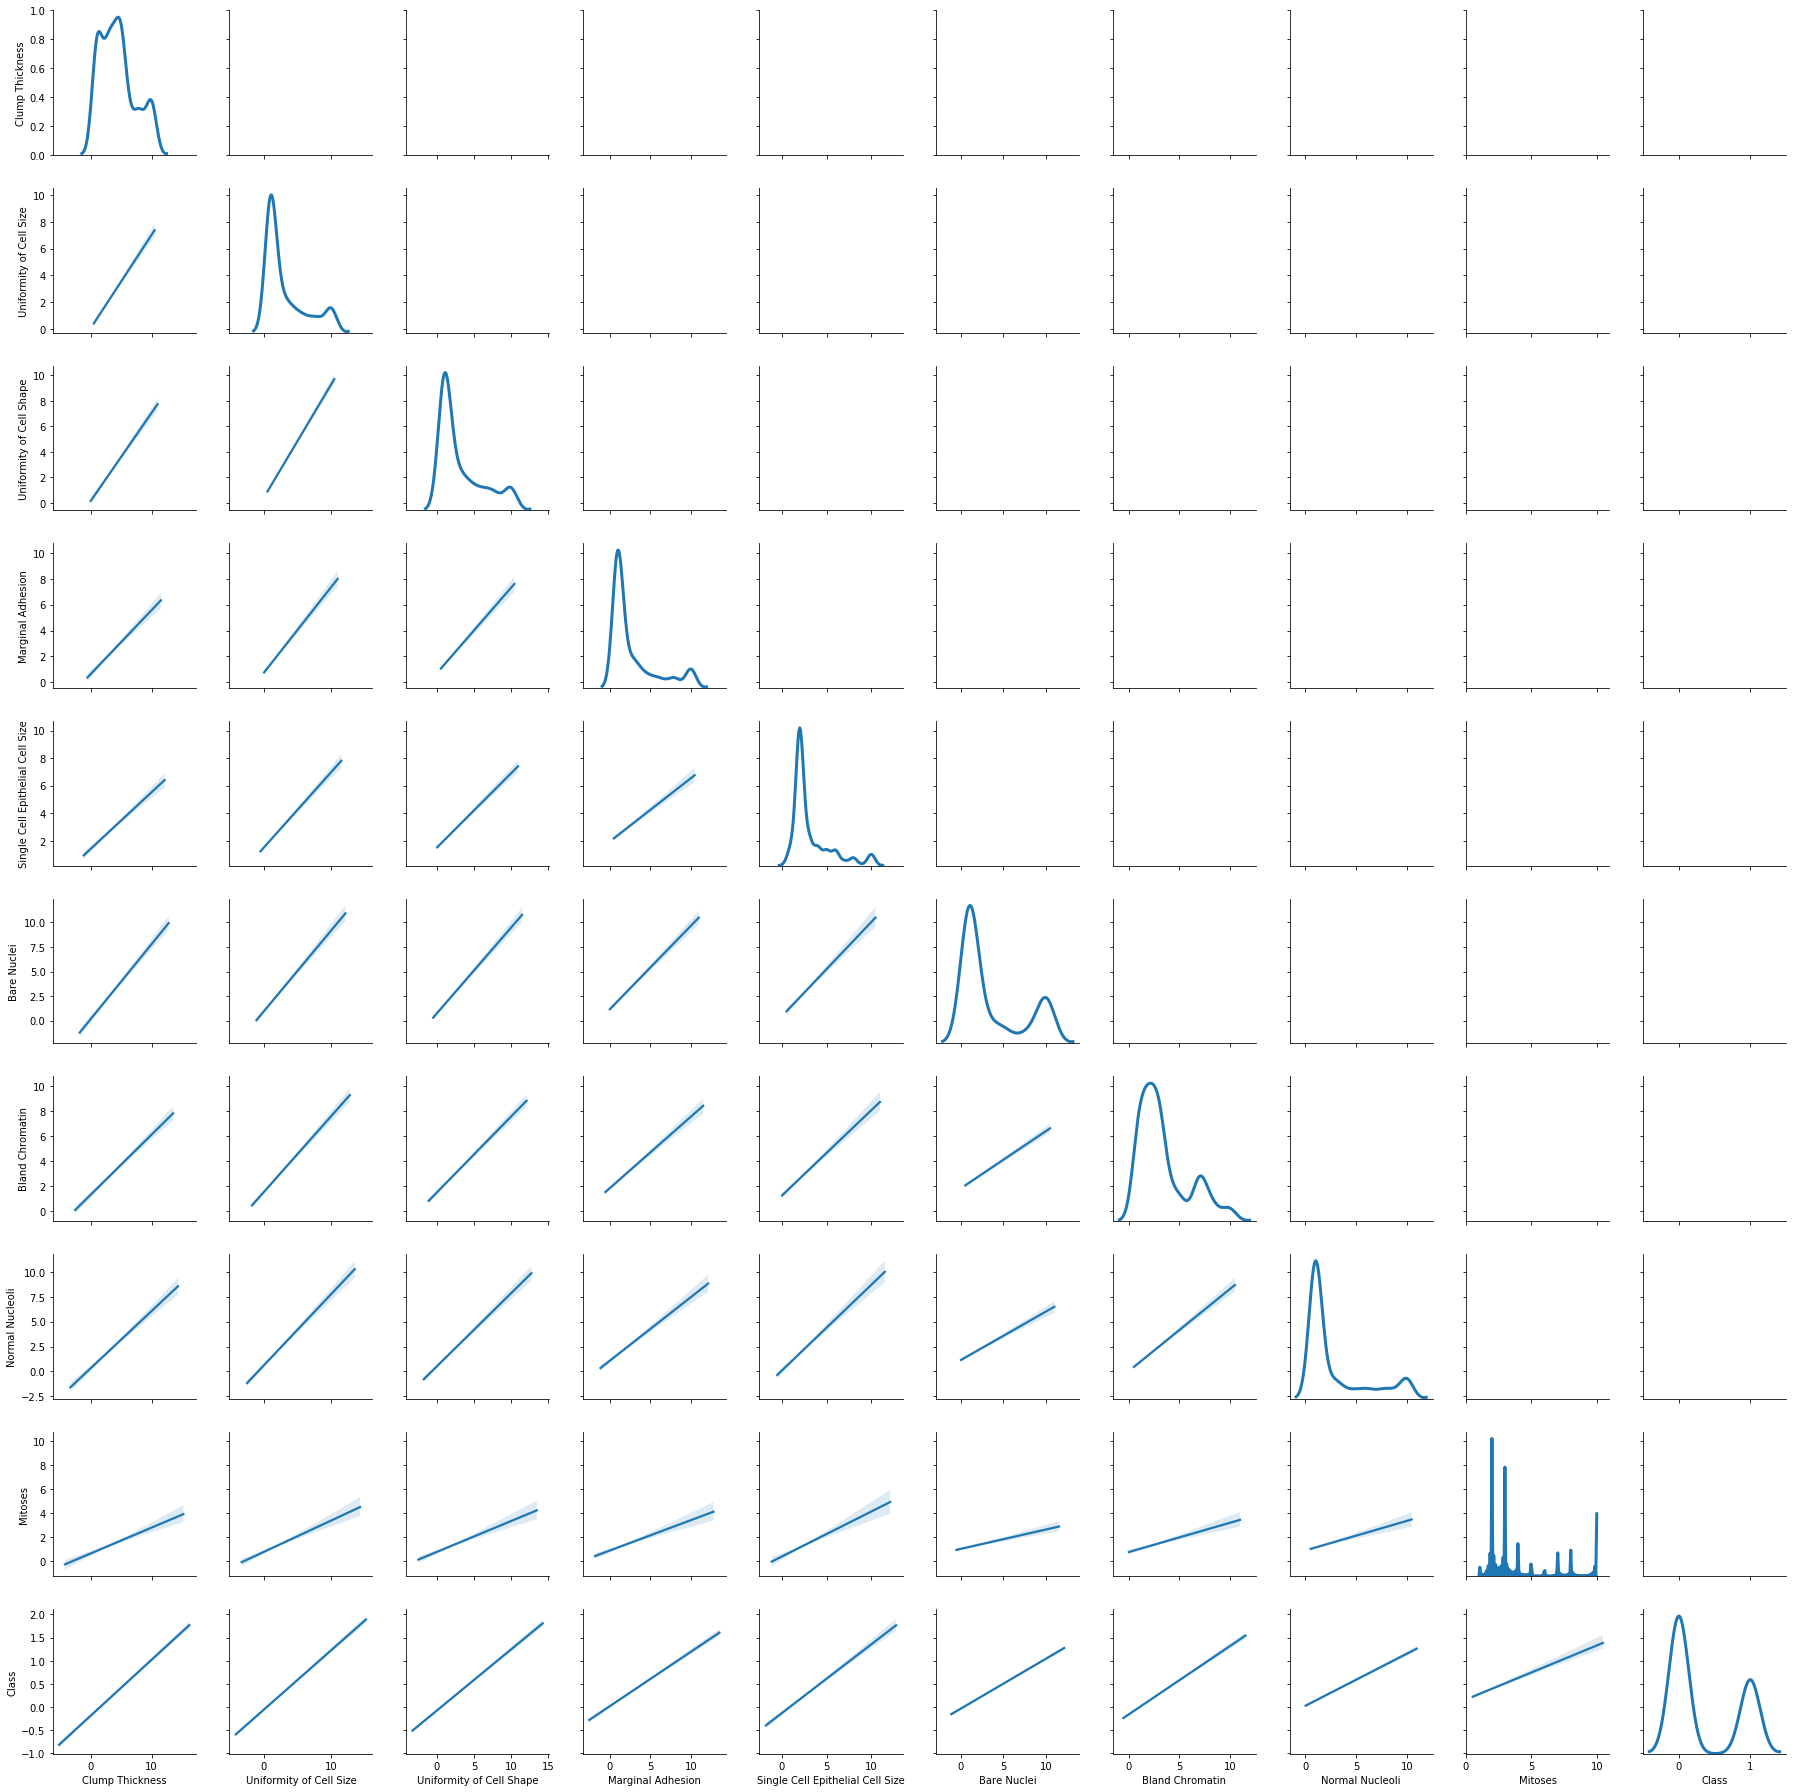

In [39]:

fig = sns.PairGrid(df, diag_sharey=False)
fig.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
fig.map_diag(sns.kdeplot, lw=3)
plt.show()

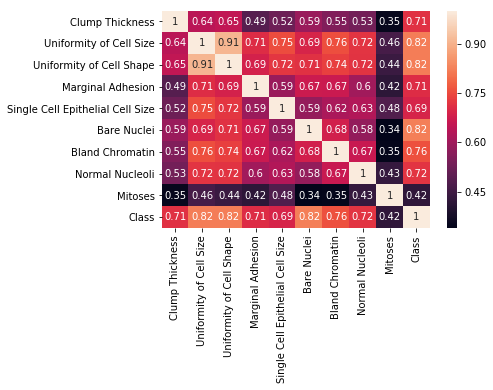

In [32]:
sns.heatmap(df.corr(), annot= True)
plt.show()

### Heatmap of variables to check correlations.
We can use this heatmap to see how the variables correlate with each other. We see that all the variables are highly correlated. We can use PCA to lower the variables specially the ones that are highly correlated like cell size and cell shape but for now we can run a imple analysis using the given variables. 

### Splitting up the data for modelling 
We are going to create a split of the data for validation purposes.

In [49]:
X = df.drop('Class', axis=1)
Y = df['Class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.5, stratify = Y)

### Logistic Regression
Using a simple logistic regression as a baseline we can see how our model does.

In [50]:
logrmodel = LogisticRegression(solver='liblinear', class_weight='balanced')
logrmodel.fit(X_train, Y_train)
print ("50% validation accuracy: ", logrmodel.score(X_test, Y_test))

50% validation accuracy:  0.9532163742690059


In [51]:
pd.crosstab(Y_test, logrmodel.predict(X_test))

col_0,0,1
Class,,
0,213,9
1,7,113


In [66]:
from sklearn.model_selection import cross_val_score

cross_val_score(logrmodel, X, Y, cv=8)

array([0.91860465, 0.97674419, 0.94186047, 0.97674419, 0.98823529,
       0.96470588, 0.98823529, 1.        ])

The logistic model performs fairly well, except during cross validation when there are 8 splits there is large variance in the prediction accuracy which means that the model may be over fitting. Thus we may need to take a different approach such as a decision tree.

### Decision Tree


In [63]:
decision_tree = DecisionTreeClassifier(class_weight='balanced')

decision_tree.fit(X_train, Y_train)

print ('model accuracy: {:.3f}%'.format(decision_tree.score(X_test,Y_test)*100))

model accuracy: 92.398%


In [64]:
pd.crosstab(Y_test, decision_tree.predict(X_test))

col_0,0,1
Class,,
0,207,15
1,11,109


In [65]:
cross_val_score(decision_tree, X, Y, cv=8)

array([0.89534884, 0.89534884, 0.90697674, 0.95348837, 0.94117647,
       0.98823529, 0.97647059, 0.92857143])

The decision tree performs similarly well to the logistic regression model, but during cross validation when there are 8 splits there is large variance in the prediction accuracy which means that the decision tree may also be over fitting. Thus we may need to take a different approach such as a random forest which is known to counteract over fitting.

### Random Forest

In [70]:
random_forest = RandomForestClassifier(class_weight='balanced', n_estimators=100)

random_forest.fit(X_train, Y_train)

print ('model accuracy: {:.3f}%'.format(random_forest.score(X_test,Y_test)*100))

model accuracy: 96.491%


In [71]:
pd.crosstab(Y_test, random_forest.predict(X_test))

col_0,0,1
Class,,
0,213,9
1,3,117


In [72]:
cross_val_score(random_forest,X, Y, cv=8)

array([0.93023256, 0.95348837, 0.94186047, 0.96511628, 0.96470588,
       0.98823529, 0.97647059, 0.98809524])

The random forest gives us the best model as during cross validation it offers the least variance between the accuracy of the 8 splits, thus overfitting has been reduced for this model compared to the logistic regression model and the decision tree.